### Defining My imports

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp

### Using the Pandas library to import data from my excel document

In [96]:
# This is the excel file
data_file = r"E:\UChicago\Summer 2025\Photon Queue\Laser Calibration\GRIN lens mount data.xlsx"
df = pd.read_excel(data_file) # This is the file imported to pandas to be referenced

'''
The way this is organized is:
pmfl: polarization maintaining lens
nl: non-polarization maintaining lens
_#: the number that the lens is
x: horizontal direction
y: vertical direction
p: signifies that it is a power reading

The way the above terms fit together will be: 
Example: central_dict["pl_#"]["xp"]

z: distance from the end of the lens to the razor


Note: All lengths will be inputed in mm. These will be converted to meters in processing
Note: All optical power will be in mW (milla-Watts). This can be converted later as well

Note: When doing repeated trials for the polarization maintaining lens 1 I did not focus on
paintaining the angle because it is so variable based on the orientation of the lens.
(like the angular orientation - 180 degrees, 90 degrees, etc)
'''

central_dict = {
    "pmfl_1": {
        "x": np.array(df.iloc[2:22, 1]),
        "xp": np.array(df.iloc[2:22, 2]), 
        "y": np.array(df.iloc[2:18, 3]),
        "yp": np.array(df.iloc[2:18, 4]),
        "x2": np.array(df.iloc[2:21, 17]),
        "xp2": np.array(df.iloc[2:21, 18]), 
        "y2": np.array(df.iloc[2:21, 19]),
        "yp2": np.array(df.iloc[2:21, 20]),
        "x3": np.array(df.iloc[2:22, 21]),
        "xp3": np.array(df.iloc[2:22, 22]), 
        "y3": np.array(df.iloc[2:21, 23]),
        "yp3": np.array(df.iloc[2:21, 24]),
        "x4": np.array(df.iloc[2:24, 25]),
        "xp4": np.array(df.iloc[2:24, 26]), 
        "y4": np.array(df.iloc[2:23, 27]),
        "yp4": np.array(df.iloc[2:23, 28]),
        "x5": np.array(df.iloc[2:23, 29]),
        "xp5": np.array(df.iloc[2:23, 30]), 
        "y5": np.array(df.iloc[2:19, 31]),
        "yp5": np.array(df.iloc[2:19, 32])
    },
    "pmfl_3": {
        "x": np.array(df.iloc[2:20, 5]),
        "xp": np.array(df.iloc[2:20, 6]), 
        "y": np.array(df.iloc[2:19, 7]),
        "yp": np.array(df.iloc[2:19, 8])
    },
    "nl_1": {
        "x": np.array(df.iloc[2:20, 9]),
        "xp": np.array(df.iloc[2:20, 10]), 
        "y": np.array(df.iloc[2:22, 11]),
        "yp": np.array(df.iloc[2:22, 12])
    },
    "nl_2": {
        "x": np.array(df.iloc[2:21, 13]),
        "xp": np.array(df.iloc[2:21, 14]), 
        "y": np.array(df.iloc[2:22, 15]),
        "yp": np.array(df.iloc[2:22, 16])
    }, 
    "z": 90 # note: this is the value I have recorded in the excel file as well!
}

# Testing
# print(central_dict["pl_1"]["x"])

# Below is to improve readability later on
lenses = ["pmfl_1", "pmfl_3", "nl_1", "nl_2"]
measurements = ["x", "xp", "y", "yp"]

# Specific to pmfl_1
measurements_plus = [["x", "xp", "y", "yp"], ["x2", "xp2", "y2", "yp2"], ["x3", "xp3", "y3", "yp3"], ["x4", "xp4", "y4", "yp4"], ["x5", "xp5", "y5", "yp5"]]
trial_list = ["trial_1", "trial_2", "trial_3", "trial_4", "trial_5"]

### Processing the Data

In [97]:
# This is for Best Fit
def func(x, a, b, offset, w): #x: blade position, z: offset of pivot point, a: amplitude scaling, b: final offset, f:
    return a * (1- sp.special.erf(np.sqrt(2)*(x - offset)/w)) + b

bounds = [[-100,-100,-100,0],[100,100,100,100]]

def solve_store(data_x, data_y, bounds, guess):
    """
    This will take the data that was measured and solve for the optimal fit of the above function.
    """
    max_x = max(data_x)
    max_y = max(data_y)
    min_y = min(data_y)
    popt, pcov = sp.optimize.curve_fit(func, data_x, data_y, (max_y, min_y, guess, 1E-3),bounds=bounds, maxfev=10000)
    width_dist = (central_dict["z"]/1000, popt[3]/1000)
    return {"max_x": max_x, "max_y": max_y, "min_y": min_y, "popt": popt, "pcov": pcov, "width,dist": width_dist}


for lens in lenses:
    central_dict[lens]["curve_soln_x"] = solve_store(central_dict[lens]["x"], central_dict[lens]["xp"], bounds=bounds, guess=0.0025)
    central_dict[lens]["curve_soln_y"] = solve_store(central_dict[lens]["y"], central_dict[lens]["yp"], bounds=bounds, guess=0.002)
    # special processing for pmfl_1
    if lens == "pmfl_1":
        central_dict[lens]["extra_curve_soln_x"] = {
            "trial_1": central_dict[lens]["curve_soln_x"],
            "trial_2": solve_store(central_dict[lens]["x2"], central_dict[lens]["xp2"], bounds=bounds, guess=0.0022),
            "trial_3": solve_store(central_dict[lens]["x3"], central_dict[lens]["xp3"], bounds=bounds, guess=0.0022),
            "trial_4": solve_store(central_dict[lens]["x4"], central_dict[lens]["xp4"], bounds=bounds, guess=0.0022),
            "trial_5": solve_store(central_dict[lens]["x5"], central_dict[lens]["xp5"], bounds=bounds, guess=0.0022),
        }
        central_dict[lens]["extra_curve_soln_y"] = {
            "trial_1": central_dict[lens]["curve_soln_y"],
            "trial_2": solve_store(central_dict[lens]["y2"], central_dict[lens]["yp2"], bounds=bounds, guess=0.002),
            "trial_3": solve_store(central_dict[lens]["y3"], central_dict[lens]["yp3"], bounds=bounds, guess=0.002),
            "trial_4": solve_store(central_dict[lens]["y4"], central_dict[lens]["yp4"], bounds=bounds, guess=0.002),
            "trial_5": solve_store(central_dict[lens]["y5"], central_dict[lens]["yp5"], bounds=bounds, guess=0.002),
        }



### Plotting

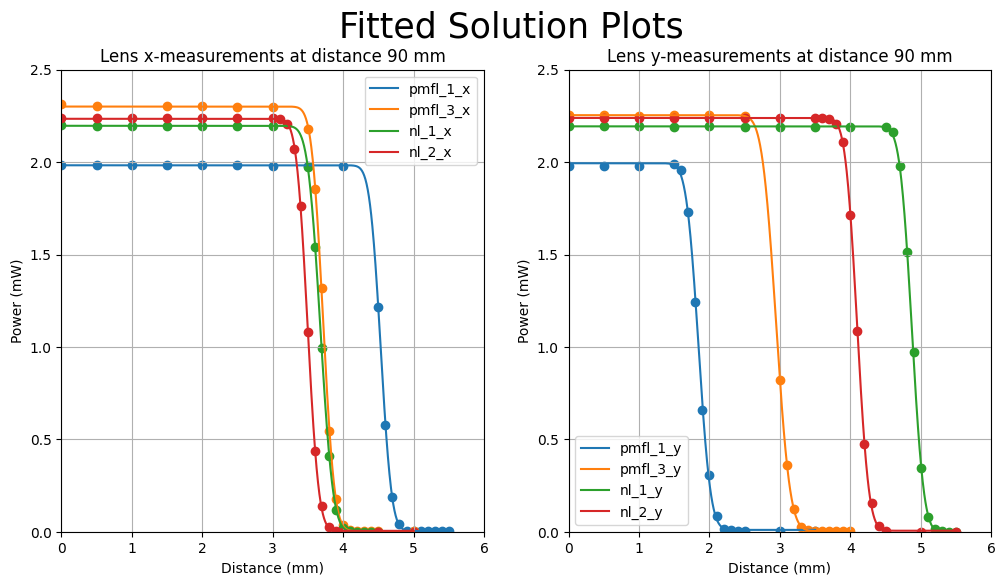

In [98]:
# Setting up the figure to be used:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Fitted Solution Plots', size='25')
sub = 1

for lens in lenses:
    # For the horizontal direction
    plt.subplot(1,2,sub%2)
    plt.scatter(central_dict[lens]["x"], central_dict[lens]["xp"])
    perf_x = np.linspace(min(central_dict[lens]["x"]), central_dict[lens]["curve_soln_x"]["max_x"], 1000)
    plt.plot(perf_x, func(perf_x, *central_dict[lens]["curve_soln_x"]["popt"]), label = f'{lens}_x')
    plt.ylabel("Power (mW)")
    plt.xlabel("Distance (mm)")
    plt.title(f'Lens x-measurements at distance {central_dict["z"]} mm')
    plt.legend()
    plt.ylim([0,2.5])
    plt.xlim([0,6])
    plt.grid(True)
    sub += 1
    # For the vertical direction
    plt.subplot(1,2,sub%2+2)
    plt.scatter(central_dict[lens]["y"], central_dict[lens]["yp"])
    perf_x = np.linspace(min(central_dict[lens]["y"]), central_dict[lens]["curve_soln_y"]["max_x"], 1000)
    plt.plot(perf_x, func(perf_x, *central_dict[lens]["curve_soln_y"]["popt"]), label = f'{lens}_y')
    plt.ylabel("Power (mW)")
    plt.xlabel("Distance (mm)")
    plt.title(f'Lens y-measurements at distance {central_dict["z"]} mm')
    plt.legend()
    plt.ylim([0,2.5])
    plt.xlim([0,6])
    plt.grid(True)
    sub += 1

plt.show()

### Specifically for running several trials for pmfl_1

Note: I was unable to keep the same alignment for each time I put the lens back into the mount. 

This should confirm that the error is mainly on the GRIN

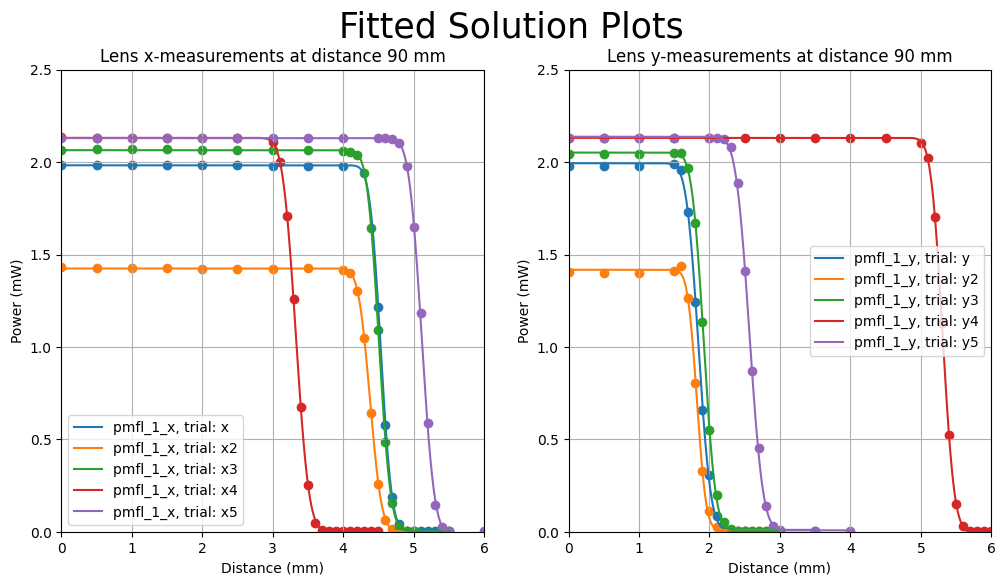

In [99]:
# Setting up the figure to be used:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Fitted Solution Plots', size='25')
sub = 1
this_thing = ["pmfl_1"] # Specifically to run this graph below


for lens in this_thing:
    trial = -1
    for measurement in measurements_plus:
        x, xp, y, yp = measurement
        trial += 1
        # For the horizontal direction
        plt.subplot(1,2,sub%2)
        plt.scatter(central_dict[lens][x], central_dict[lens][xp])
        perf_x = np.linspace(min(central_dict[lens][x]), central_dict[lens]["extra_curve_soln_x"][trial_list[trial]]["max_x"], 1000)
        plt.plot(perf_x, func(perf_x, *central_dict[lens]["extra_curve_soln_x"][trial_list[trial]]["popt"]), label = f'{lens}_x, trial: {x}')
        plt.ylabel("Power (mW)")
        plt.xlabel("Distance (mm)")
        plt.title(f'Lens x-measurements at distance {central_dict["z"]} mm')
        plt.legend()
        plt.ylim([0,2.5])
        plt.xlim([0,6])
        plt.grid(True)
        sub += 1
        # For the vertical direction
        plt.subplot(1,2,sub%2+2)
        plt.scatter(central_dict[lens][y], central_dict[lens][yp])
        perf_x = np.linspace(min(central_dict[lens][y]), central_dict[lens]["extra_curve_soln_y"][trial_list[trial]]["max_x"], 1000)
        plt.plot(perf_x, func(perf_x, *central_dict[lens]["extra_curve_soln_y"][trial_list[trial]]["popt"]), label = f'{lens}_y, trial: {y}')
        plt.ylabel("Power (mW)")
        plt.xlabel("Distance (mm)")
        plt.title(f'Lens y-measurements at distance {central_dict["z"]} mm')
        plt.legend()
        plt.ylim([0,2.5])
        plt.xlim([0,6])
        plt.grid(True)
        sub += 1

plt.show()

### Lens Width Analysis

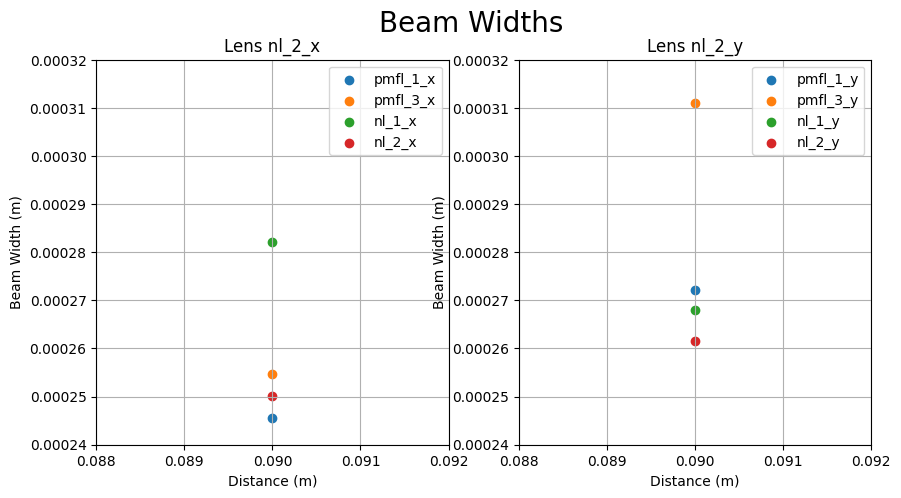

In [100]:
# data only taken at one distance

# Setting up the figure to be used:
fig = plt.figure(figsize=(10,5))
fig.suptitle('Beam Widths', size='20')
sub = 1
range = [0.00024, 0.00032]
xrange = [0.088, 0.092]

for lens in lenses:
    # For the horizontal direction
    plt.subplot(1,2,sub%2)
    plt.scatter(*central_dict[lens]["curve_soln_x"]["width,dist"], label=f'{lens}_x')
    plt.ylabel("Beam Width (m)")
    plt.xlabel("Distance (m)")
    plt.title(f'Lens {lens}_x')
    plt.xlim(xrange)
    plt.ylim(range)
    plt.grid(True)
    plt.legend()
    sub += 1
    # For the vertical direction
    plt.subplot(1,2,sub%2+2)
    plt.scatter(*central_dict[lens]["curve_soln_y"]["width,dist"], label=f'{lens}_y')
    plt.ylabel("Beam Width (m)")
    plt.xlabel("Distance (m)")
    plt.title(f'Lens {lens}_y')
    plt.xlim(xrange)
    plt.ylim(range)
    plt.grid(True)
    plt.legend()
    sub += 1

plt.show()

### Computing the Centroids?

Centroid at (4.566777523820986 mm, 1.8489645494004845 mm)
Centroid at (3.710771554848011 mm, 3.0143411293157314 mm)
Centroid at (3.682256938531548 mm, 4.86901053459098 mm)
Centroid at (3.4937681243229997 mm, 4.098455040134528 mm)


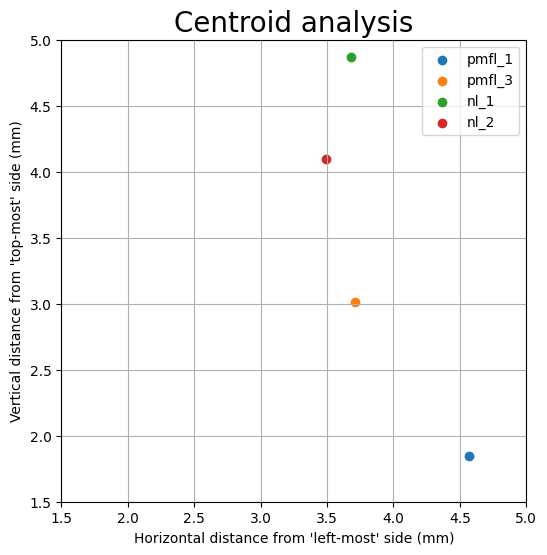

In [101]:
def intensity_profiles_to_centroid(power, trans_dist): # This takes a list of power values and translational distance values
    # Numerical derivative of power = beam intensity profile
    I = np.gradient(power, trans_dist)
    # Compute centroid
    return np.sum(trans_dist * I) / np.sum(I)

# Setting up the graph:
fig = plt.figure(figsize=(6,6))
plt.title("Centroid analysis", fontsize=20)
plt.xlabel("Horizontal distance from 'left-most' side (mm)")
plt.ylabel("Vertical distance from 'top-most' side (mm)")

for lens in lenses:
    central_dict[lens]["centroid_x"] = intensity_profiles_to_centroid(central_dict[lens]["xp"], central_dict[lens]["x"])
    central_dict[lens]["centroid_y"] = intensity_profiles_to_centroid(central_dict[lens]["yp"], central_dict[lens]["y"])
    print(f"Centroid at ({central_dict[lens]['centroid_x']} mm, {central_dict[lens]['centroid_y']} mm)")
    plt.scatter(central_dict[lens]["centroid_x"], central_dict[lens]["centroid_y"], label = f"{lens}")
    # Graphincally
plt.legend()
range = [1.5,5]
plt.xlim(range)
plt.ylim(range)
plt.grid(True)
plt.show()

### Centroids for the repeated trials:

Centroid at 4.566777523820986 mm, 1.8489645494004845 mm)
Centroid at 4.379207125942765 mm, 1.8337900477675446 mm)
Centroid at 4.508167912538019 mm, 1.9214410259583155 mm)
Centroid at 3.324782793500166 mm, 5.308817365855811 mm)
Centroid at 5.109822674416244 mm, 2.5729247949012333 mm)


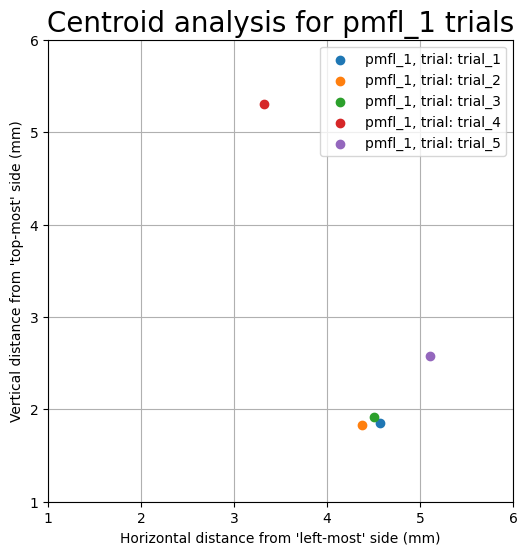

In [102]:
# Setting up the graph:
fig = plt.figure(figsize=(6,6))
plt.title("Centroid analysis for pmfl_1 trials", fontsize=20)
plt.xlabel("Horizontal distance from 'left-most' side (mm)")
plt.ylabel("Vertical distance from 'top-most' side (mm)")

for lens in this_thing:
    trial = -1
    for measurement in measurements_plus:
        x, xp, y, yp = measurement
        trial += 1
        central_dict[lens]["extra_curve_soln_x"][trial_list[trial]]["centroid_x"] = intensity_profiles_to_centroid(central_dict[lens][xp], central_dict[lens][x])
        central_dict[lens]["extra_curve_soln_y"][trial_list[trial]]["centroid_y"] = intensity_profiles_to_centroid(central_dict[lens][yp], central_dict[lens][y])
        print(f"Centroid at {central_dict[lens]['extra_curve_soln_x'][trial_list[trial]]['centroid_x']} mm, {central_dict[lens]['extra_curve_soln_y'][trial_list[trial]]['centroid_y']} mm)")
        plt.scatter(central_dict[lens]["extra_curve_soln_x"][trial_list[trial]]["centroid_x"], central_dict[lens]["extra_curve_soln_y"][trial_list[trial]]["centroid_y"], label = f"{lens}, trial: {trial_list[trial]}")
    # Graphincally
plt.legend()
range = [1, 6]
plt.xlim(range)
plt.ylim(range)
plt.grid(True)
plt.show()

In [103]:
# print(central_dict)